In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
raw = """2199943210
3987894921
9856789892
8767896789
9899965678"""

In [48]:
with open('2021-12-09_input') as f:
    raw = f.read().strip()

[[2 1 9 9 9 4 3 2 1 0]
 [3 9 8 7 8 9 4 9 2 1]
 [9 8 5 6 7 8 9 8 9 2]
 [8 7 6 7 8 9 6 7 8 9]
 [9 8 9 9 9 6 5 6 7 8]]
[[False  True False False False False False False False  True]
 [False False False False False False False False False False]
 [False False  True False False False False False False False]
 [False False False False False False False False False False]
 [False False False False False False  True False False False]]
15
[[ True  True False False False  True  True  True  True  True]
 [ True False  True  True  True False  True False  True  True]
 [False  True  True  True  True  True False  True False  True]
 [ True  True  True  True  True False  True  True  True False]
 [False  True False False False  True  True  True  True  True]]


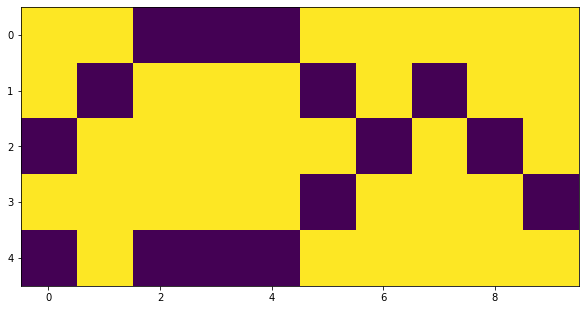

In [22]:
#part one
numbers = np.array([list(line) for line in raw.split('\n')], dtype=np.int_)
print(numbers)

minima = np.zeros(numbers.shape, dtype=np.bool_)


for i in range(0, numbers.shape[0]):
    for j in range(0, numbers.shape[1]):
        
        adjacent = []
        if i - 1 >= 0:
            adjacent.append(numbers[i - 1,j])
        if i + 1 < numbers.shape[0]:
            adjacent.append(numbers[i + 1,j])
        if j - 1 >= 0:
            adjacent.append(numbers[i,j - 1])
        if j + 1 < numbers.shape[1]:
            adjacent.append(numbers[i,j + 1])
            
        
        if numbers[i,j] < min(adjacent):
            minima[i,j] = True

print(minima)
print((numbers[minima] + 1).sum())

print(numbers < 9)

plt.figure(figsize=(10, 10))
plt.imshow(numbers < 9)




In [50]:
numbers = np.array([list(line) for line in raw.split('\n')], dtype=np.int_)
print(numbers)

print(numbers.shape)

padded = 9 * np.ones([numbers.shape[0] + 2, numbers.shape[1] + 2], dtype=np.int_)
padded[1:-1,1:-1] = numbers
print(padded)

minima = []
basins = []
in_basins = set()

for i in range(1, padded.shape[0] - 1):
    for j in range(1, padded.shape[1] - 1):
        if padded[i,j] == 9 or (i, j) in in_basins:
            continue
        
        k = i
        l = j
        while True:
            adjacent = [padded[k - 1,l], padded[k + 1,l], padded[k,l - 1], padded[k,l + 1]]
            if min(adjacent) > padded[k,l]:
                minimum = (k, l)
                break
            lowest = [(k - 1,l), (k + 1,l), (k,l - 1), (k,l + 1)][adjacent.index(min(adjacent))]
            k, l = lowest
        
#         print(minima)
        minima.append(padded[minimum[0], minimum[1]] + 1)
        this_basin = set((minimum,))
#         print(this_basin)
        
        outside = set((minimum,))
        
        while outside:
            
            adjacent = set()
            this_basin = this_basin | outside
            for entry in outside:
                k, l = entry
                adjacent = adjacent | set([point for point in [(k - 1,l), (k + 1,l), (k,l - 1), (k,l + 1)] if (padded[point[0],point[1]] < 9) and point not in this_basin])
                
            outside = adjacent
            
#         print(this_basin)
        basins.append(len(this_basin))
        in_basins = in_basins | this_basin
        
        
#         print()
        
        
print(sum(minima))
basins.sort()
print(basins[-1] * basins[-2] * basins[-3])

[[9 8 6 ... 2 1 0]
 [2 9 9 ... 3 2 2]
 [3 9 8 ... 4 5 3]
 ...
 [9 8 7 ... 3 1 2]
 [2 9 9 ... 3 2 4]
 [1 2 3 ... 4 3 5]]
(100, 100)
[[9 9 9 ... 9 9 9]
 [9 9 8 ... 1 0 9]
 [9 2 9 ... 2 2 9]
 ...
 [9 2 9 ... 2 4 9]
 [9 1 2 ... 3 5 9]
 [9 9 9 ... 9 9 9]]
[12, 26, 4, 33, 18, 18, 13, 63, 63, 17, 4, 27, 2, 72, 52, 73, 33, 53, 60, 83, 47, 4, 55, 16, 37, 89, 4, 21, 14, 23, 59, 2, 57, 33, 2, 65, 69, 3, 4, 40, 33, 39, 16, 54, 23, 77, 18, 81, 3, 4, 14, 2, 63, 18, 53, 16, 25, 2, 80, 4, 52, 67, 56, 15, 42, 34, 17, 47, 3, 30, 33, 2, 11, 15, 41, 10, 24, 34, 60, 4, 8, 15, 14, 5, 81, 29, 43, 72, 9, 44, 5, 3, 18, 30, 8, 18, 13, 5, 15, 43, 41, 14, 26, 3, 13, 3, 65, 45, 29, 2, 22, 93, 7, 68, 2, 5, 45, 10, 26, 20, 98, 10, 77, 19, 95, 32, 15, 11, 7, 10, 55, 4, 11, 70, 48, 36, 72, 100, 11, 30, 23, 20, 18, 12, 38, 17, 74, 67, 65, 69, 40, 4, 2, 21, 9, 59, 5, 19, 2, 28, 10, 97, 46, 13, 23, 14, 39, 60, 2, 2, 7, 26, 2, 53, 8, 33, 24, 7, 4, 29, 41, 75, 2, 95, 5, 38, 18, 21, 54, 18, 9, 12, 25, 68, 28, 37, 33, 6, 2, 

In [30]:
padded[1,2]

1